According to Tom Fawcett, as information is now widely available, it leds to increasing interest in methods for extracting useful information and knowledge from data.in this analysis, we are looking at how the workd happiness score is measured, the factors that influence the happiness score in 2015, 2016 and 2017. 

<h1>The Problem</h1>

How to increase happiness level?
In this experiment, the happiness level is measured by the happiness score. The experiment is aiming at finding out how the factors in dataset affect the happiness scores. The factors are:Economy, Family, Health, Freedom, Trust and Generosity.
Data can be found at:
https://www.kaggle.com/unsdsn/world-happiness

<h1>Potential Solution</h1>

1. GDP will positively influence the happiness score.
2. Freedom will positively influence the happiness score.
2. Life Expectancy will positively influence the happiness score.

<h1>The method of testing the solution</h1>

Design survey - Design surveys that covers all information needed to build the dataset/do the calculation, make sure questions can quantify those six factors that can be calculated for future use.

Select sample - Randomly select equal number of people from each country, select same number/% population of people from each group aged 0-10,10-20,20-30, 30-40,40-50,50-60,60-70,70-80,>80. Make sure the numbers of male and female are equal. It is good to take samples as a percentage of the whole population. 

After the samples are selected, ask them to do the survey, survey should be completed within the same time, the format should be diversified (electronic/paper copies).

The experiment - The first phase do 10% of them to see how the data goes, then do another 50%, finally 40%.

Get results - Collect the results, do the analysis and complete the dataset.



In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from IPython.display import HTML, display
%matplotlib inline
df_2015 = pd.read_csv('/Users/zhangtong/Downloads/world-happiness-report/2015.csv')
df_2016 = pd.read_csv('/Users/zhangtong/Downloads/world-happiness-report/2016.csv')
df_2017 = pd.read_csv('/Users/zhangtong/Downloads/world-happiness-report/2017.csv')
display(df_2015.head())
display(df_2016.head())
display(df_2017.head())



,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


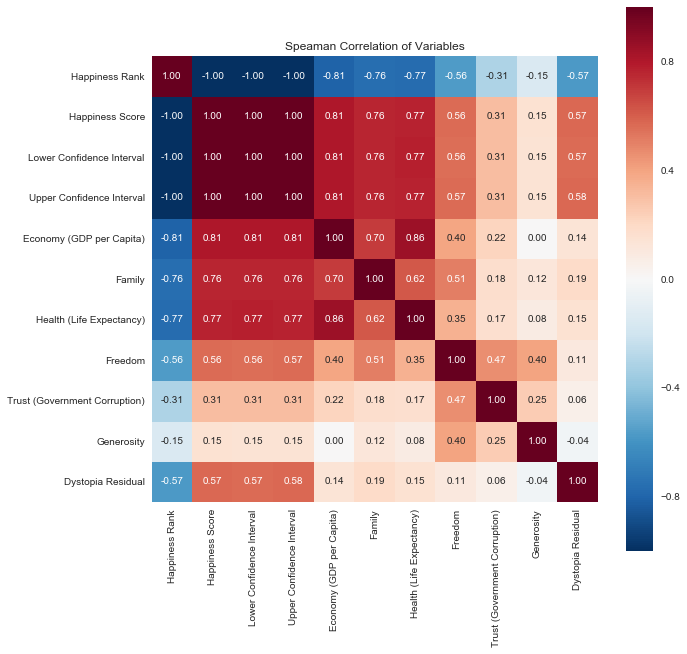

In [21]:
corrmat = df_2016.corr(method='spearman') 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.title('Speaman Correlation of Variables')
plt.show()

According to Spearman correlation, we can see that in 2016, the happiness score is most correlated with Economy, followed by Health and Family. These three factors are most correlated. Thus, we are going to have experiments to test out. 

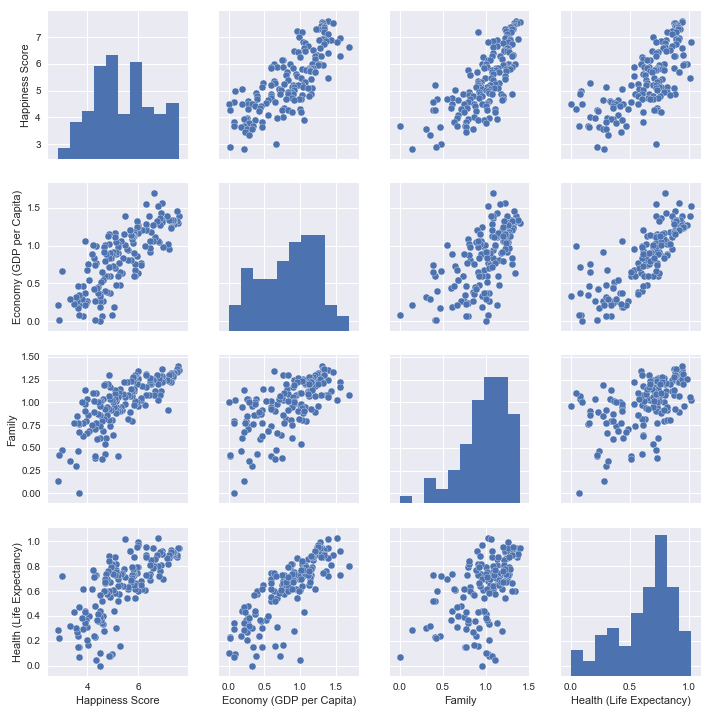

In [30]:
sns.pairplot(df_2015[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)']])

From the pari plots above, we can see strong relation for the happiness scores between Economy, Family, and Health. 

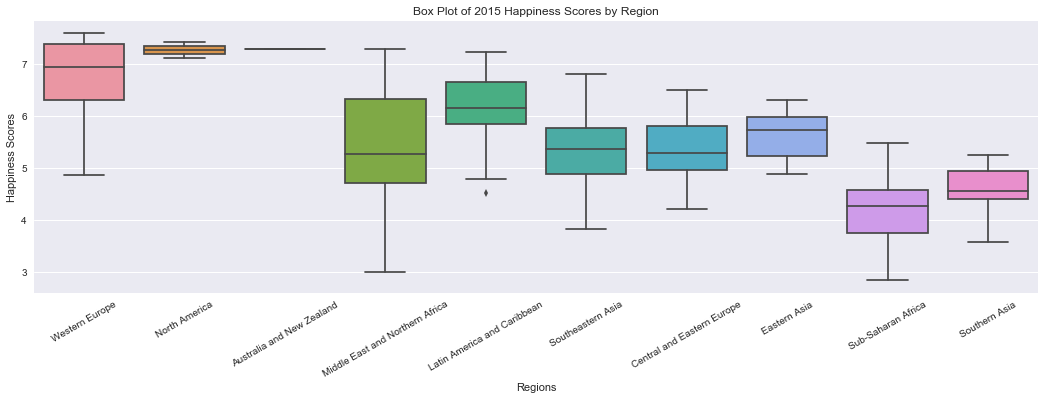

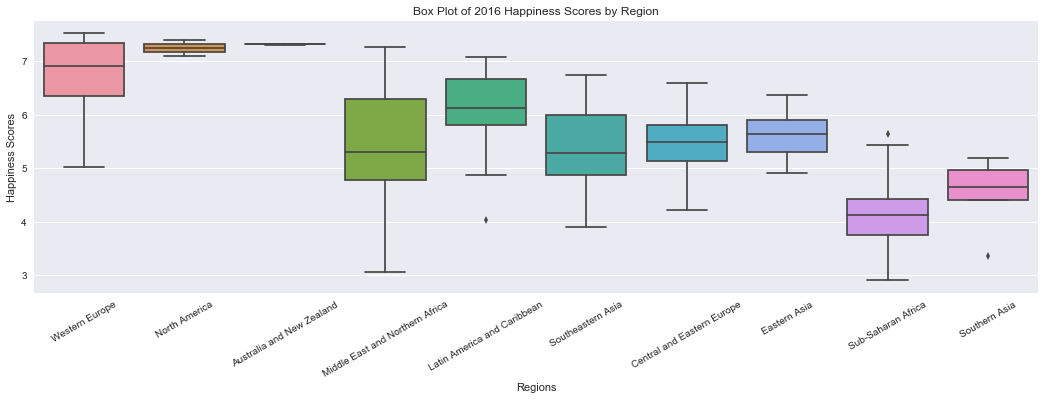

In [33]:
plt.figure(figsize=(18, 5))
sns.boxplot(x='Region', y='Happiness Score',data=df_2015)
plt.xlabel('Regions')
plt.ylabel('Happiness Scores')
plt.xticks(rotation=30)
plt.title('Box Plot of 2015 Happiness Scores by Region')

plt.figure(figsize=(18, 5))
sns.boxplot(x='Region', y='Happiness Score',data=df_2016)
plt.xticks(rotation=30)
plt.xlabel('Regions')
plt.ylabel('Happiness Scores')
plt.title('Box Plot of 2016 Happiness Scores by Region')
plt.show()
plt.show()

From the charts above, we can see that Australia and New Zealand have the most highest happiness scores, followed by Western Europe, even though Western Europe have 7 out of top ten in rankings. Sub-Saharan Africa has the lowest average Happiness scores. The overall pattern of happiness scores in the year 2015 and 2016 are similar.